In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Clustering

Clustering is the task of gathering samples into groups of similar
samples according to some predefined similarity or dissimilarity
measure (such as the Euclidean distance).
In this section we will explore a basic clustering task on some synthetic and real datasets.

Here are some common applications of clustering algorithms:

- Compression, in a data reduction sens
- Can be used as a preprocessing step for recommender systems
- Similarly:
   - grouping related web news (e.g. Google News) and web search results
   - grouping related stock quotes for investment portfolio management
   - building customer profiles for market analysis
- Building a code book of prototype samples for unsupervised feature extraction



Let's start of with a very simple and obvious example:

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
X.shape

In [ ]:
plt.scatter(X[:, 0], X[:, 1])

There are clearly three separate groups of points in the data, and we would like to recover them using clustering.
Even if the groups are obvious in the data, it is hard to find them when the data lives in a high-dimensional space.

Now we will use one of the simplest clustering algorithms, K-means.
This is an iterative algorithm which searches for three cluster
centers such that the distance from each point to its cluster is
minimized.
**Question:** what would you expect the output to look like?

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)

We can get the cluster labels either by calling fit and then accessing the 
``labels_`` attribute of the K means estimator, or by calling ``fit_predict``.
Either way, the result contains the ID of the cluster that each point is assigned to.

In [ ]:
labels = kmeans.fit_predict(X)

In [ ]:
labels

In [ ]:
all(labels == kmeans.labels_)

Let's visualize the assignments that have been found

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=labels)

Here, we are probably satisfied with the clustering. But in general we might want to have a more quantitative evaluation. How about we compare our cluster labels with the ground truth we got when generating the blobs?

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(accuracy_score(y, labels))
print(confusion_matrix(y, labels))


In [ ]:
np.mean(y == labels)

Even though we recovered the partitioning of the data into clusters perfectly, the cluster IDs we assigned were arbitrary,
and we can not hope to recover them. Therefore, we must use a different scoring metric, such as ``adjusted_rand_score``, which is invariant to permutations of the labels:

In [ ]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(y, labels)

**Clustering comes with assumptions**: A clustering algorithm finds clusters by making assumptions with samples should be grouped together. Each algorithm makes different assumptions and the quality and interpretability of your results will depend on whether the assumptions are satisfied for your goal. For K-means clustering, the model is that all clusters have equal, spherical variance.

**In general, there is no guarantee that structure found by a clustering algorithm has anything to do with what you were interested in**.

We can easily create a dataset that has non-isotropic clusters, on which kmeans will fail:

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

y_pred = KMeans(n_clusters=3).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred)

## Some Notable Clustering Routines

The following are two well-known clustering algorithms. 

- `sklearn.cluster.KMeans`: <br/>
    The simplest, yet effective clustering algorithm. Needs to be provided with the
    number of clusters in advance, and assumes that the data is normalized as input
    (but use a PCA model as preprocessor).
- `sklearn.cluster.MeanShift`: <br/>
    Can find better looking clusters than KMeans but is not scalable to high number of samples.
- `sklearn.cluster.DBSCAN`: <br/>
    Can detect irregularly shaped clusters based on density, i.e. sparse regions in
    the input space are likely to become inter-cluster boundaries. Can also detect
    outliers (samples that are not part of a cluster).
- `sklearn.cluster.AffinityPropagation`: <br/>
    Clustering algorithm based on message passing between data points.
- `sklearn.cluster.SpectralClustering`: <br/>
    KMeans applied to a projection of the normalized graph Laplacian: finds
    normalized graph cuts if the affinity matrix is interpreted as an adjacency matrix of a graph.
- `sklearn.cluster.Ward`: <br/>
    Ward implements hierarchical clustering based on the Ward algorithm,
    a variance-minimizing approach. At each step, it minimizes the sum of
    squared differences within all clusters (inertia criterion).

Of these, Ward, SpectralClustering, DBSCAN and Affinity propagation can also work with precomputed similarity matrices.

<img src="figures/cluster_comparison.png" width="900">

## Exercise: digits clustering

Perform K-means clustering on the digits data, searching for ten clusters.
Visualize the cluster centers as images (i.e. reshape each to 8x8 and use
``plt.imshow``)  Do the clusters seem to be correlated with particular digits? What is the ``adjusted_rand_score``?

Visualize the projected digits as in the last notebook, but this time use the
cluster labels as the color.  What do you notice?

In [9]:
from sklearn.datasets import load_digits
digits = load_digits()
# ...

(10, 64)


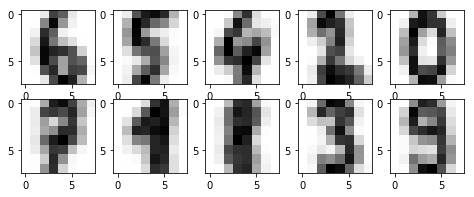

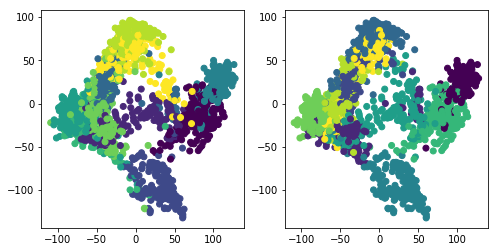

In [14]:
# %load solutions/08B_digits_clustering.py
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
clusters = kmeans.fit_predict(digits.data)

print(kmeans.cluster_centers_.shape)

#------------------------------------------------------------
# visualize the cluster centers
fig = plt.figure(figsize=(8, 3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i)
    ax.imshow(kmeans.cluster_centers_[i].reshape((8, 8)),
              cmap=plt.cm.binary)
from sklearn.manifold import Isomap
X_iso = Isomap(n_neighbors=10).fit_transform(digits.data)

#------------------------------------------------------------
# visualize the projected data
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c=clusters)
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c=digits.target)


In [2]:
digits.keys()

dict_keys(['DESCR', 'target', 'images', 'target_names', 'data'])

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(digits.data)